# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [3]:
matches.shape

(756, 14)

In [4]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### Replacing DD with DC

In [5]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


## Taking in cosideration KXIP VS DC matches

In [7]:
KD = matches[np.logical_or(np.logical_and(matches['team1']=='Kings XI Punjab',matches['team2']=='Delhi Capitals'),
                            np.logical_and(matches['team2']=='Kings XI Punjab',matches['team1']=='Delhi Capitals'))]

KD.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla
35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ..."
73,2008,Chandigarh,2008-04-27,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali"
100,2008,Delhi,2008-05-17,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla
120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands


In [8]:
KD.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [9]:
KD.shape

(24, 14)

In [17]:
KD.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [18]:
KD.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,24.0,6.208333,12.744919,0.0,0.0,0.0,6.25,51.0
win_by_wickets,24.0,4.250000,3.454675,0.0,0.0,5.0,6.25,10.0


## HEAD TO HEAD

In [21]:
KD.groupby("winner")["winner"].count()

winner
Delhi Capitals     10
Kings XI Punjab    14
Name: winner, dtype: int64

Text(0.5, 1.0, 'KXIP VS DC - head to head')

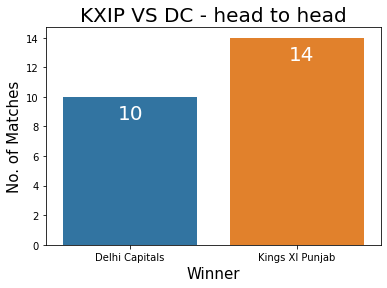

In [28]:
sns.countplot(KD["winner"])
plt.text(-0.07,8.5,str(KD['winner'].value_counts()['Delhi Capitals']),size=20,color='white')
plt.text(0.95,12.5,str(KD['winner'].value_counts()['Kings XI Punjab']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('KXIP VS DC - head to head',fontsize = 20)

In [30]:
Season_wise_Match_Winner = pd.DataFrame(KD.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between KXIP VS DC :")
Season_wise_Match_Winner

Season wise winner of matches between KXIP VS DC :


winner count
season winner                       
2008   Kings XI Punjab             2
2009   Delhi Capitals              1
       Kings XI Punjab             1
2010   Delhi Capitals              1
       Kings XI Punjab             1
2011   Delhi Capitals              1
       Kings XI Punjab             1
2012   Delhi Capitals              2
2013   Kings XI Punjab             2
2014   Kings XI Punjab             2
2015   Delhi Capitals              2
2016   Delhi Capitals              1
       Kings XI Punjab             1
2017   Delhi Capitals              1
       Kings XI Punjab             1
2018   Kings XI Punjab             2
2019   Delhi Capitals              1
       Kings XI Punjab             1

### Winning Percentage

In [57]:
Winning_Percentage = KD['winner'].value_counts()/len(KD['winner'])

In [58]:
print("KXIP winning percentage against DC(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("DC winning percentage against KXIP(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

KXIP winning percentage against DC(overall) : 58%
DC winning percentage against KXIP(overall) : 42%


In [59]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [60]:
performance("Kings XI Punjab",KD)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 8

Average runs by which a given team wins while defending  :  12.0
Average wickets by which a given team wins while chasing :  6.0


In [61]:
performance("Delhi Capitals",KD)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 8

Average runs by which a given team wins while defending  :  40.0
Average wickets by which a given team wins while chasing :  7.0


## Toss Analysis

In [62]:
Toss_Decision = pd.DataFrame(KD.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner     toss_decision               
Delhi Capitals  bat                        4
                field                     11
Kings XI Punjab bat                        2
                field                      7

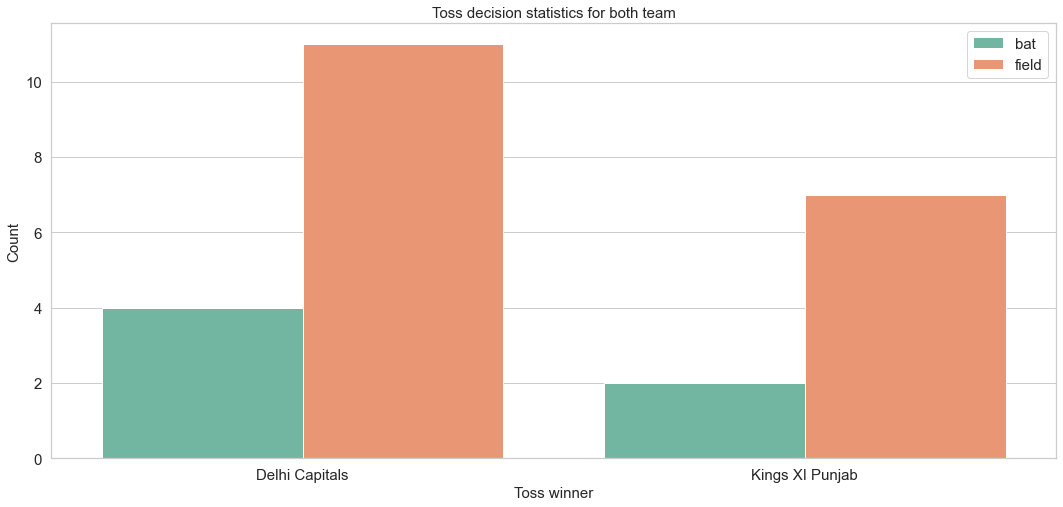

In [42]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(KD['toss_winner'],palette='Set2',hue=KD['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [40]:
Toss_Decision_based_Winner = pd.DataFrame(KD.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner     toss_decision winner                 
Delhi Capitals  bat           Delhi Capitals        1
                              Kings XI Punjab       3
                field         Delhi Capitals        6
                              Kings XI Punjab       5
Kings XI Punjab bat           Delhi Capitals        2
                field         Delhi Capitals        1
                              Kings XI Punjab       6

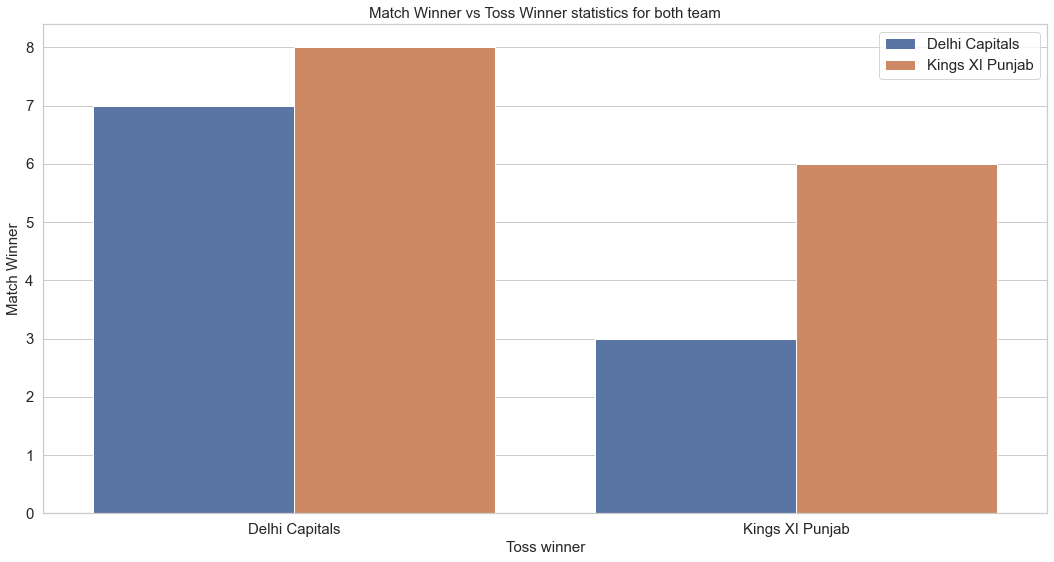

In [43]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KD['toss_winner'],hue=KD['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [46]:
KXIP = KD[KD["toss_winner"]=="Kings XI Punjab"]
DC = KD[KD["toss_winner"]=="Delhi Capitals"]

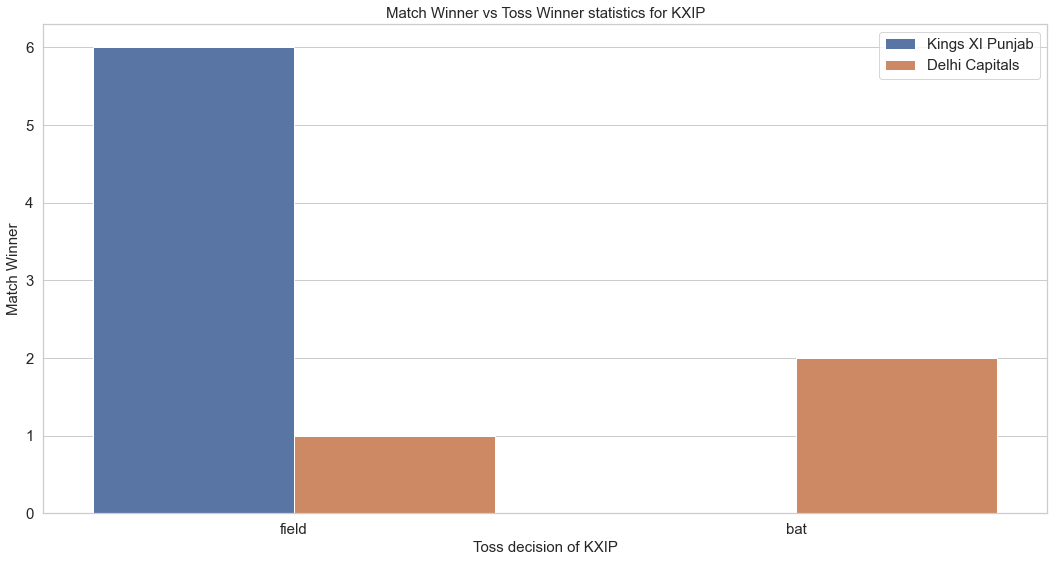

In [49]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KXIP['toss_decision'],hue=KXIP['winner'])
plt.title('Match Winner vs Toss Winner statistics for KXIP',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KXIP',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

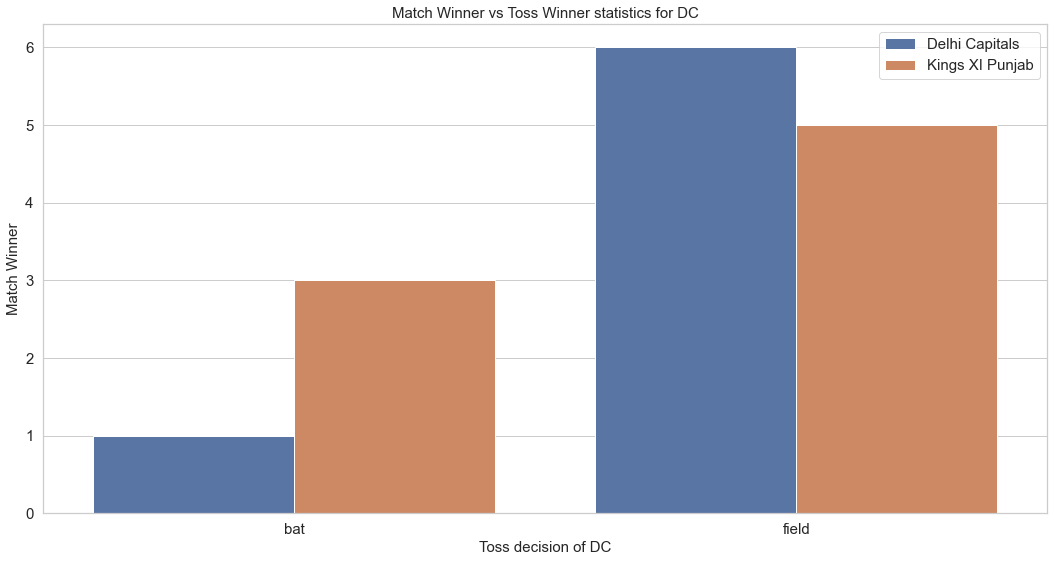

In [50]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DC['toss_decision'],hue=DC['winner'])
plt.title('Match Winner vs Toss Winner statistics for DC',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of DC',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [51]:
player_of_the_match = pd.DataFrame(KD.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
PP Chawla,2
UT Yadav,2
AS Rajpoot,1
S Curran,1
SS Iyer,1
G Gambhir,1
NM Coulter-Nile,1
SM Katich,1
B Lee,1
A Mishra,1


### Recent Year Performance Analysis

In [53]:
cond1 = KD["season"] == 2018
cond2 = KD["season"] == 2019
final = KD[cond1 | cond2]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7895,2018,Mohali,08/04/18,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ..."
7915,2018,Delhi,23/04/18,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Kings XI Punjab,4,0,AS Rajpoot,Feroz Shah Kotla
11149,2019,Mohali,01/04/19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Kings XI Punjab,14,0,S Curran,IS Bindra Stadium
11328,2019,Delhi,20/04/19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,SS Iyer,Feroz Shah Kotla Ground


In [54]:
final.shape

(4, 14)

In [55]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
SS Iyer,1
S Curran,1
AS Rajpoot,1
KL Rahul,1


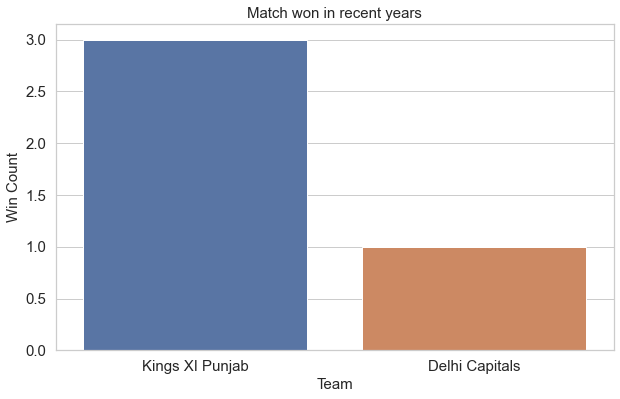

In [56]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related head to head , toss decision , match winner and toss decision relationship , recent year performace etc we can predict KXIP to be favorite for this match specially if the chase the score. 